In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm
from PIL import Image

C:\Users\shivang\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\shivang\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\shivang\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
train_messy = r"C:\Users\shivang\Desktop\PROJECTS\Python-ML\CleanRoom Vs Dirty Room\input\images\train\messy"
train_clean =r"C:\Users\shivang\Desktop\PROJECTS\Python-ML\CleanRoom Vs Dirty Room\input\images\train\clean"
test_messy = r"C:\Users\shivang\Desktop\PROJECTS\Python-ML\CleanRoom Vs Dirty Room\input\images\val\messy"
test_clean = r"C:\Users\shivang\Desktop\PROJECTS\Python-ML\CleanRoom Vs Dirty Room\input\images\val\clean"
image_size = 128

In [3]:
os.listdir(train_messy)

['0.png',
 '1.png',
 '10.png',
 '11.png',
 '12.png',
 '13.png',
 '14.png',
 '15.png',
 '16.png',
 '17.png',
 '18.png',
 '19.png',
 '2.png',
 '20.png',
 '21.png',
 '22.png',
 '23.png',
 '24.png',
 '25.png',
 '26.png',
 '27.png',
 '28.png',
 '29.png',
 '3.png',
 '30.png',
 '31.png',
 '32.png',
 '33.png',
 '34.png',
 '35.png',
 '36.png',
 '37.png',
 '38.png',
 '39.png',
 '4.png',
 '40.png',
 '41.png',
 '42.png',
 '43.png',
 '44.png',
 '45.png',
 '46.png',
 '47.png',
 '48.png',
 '49.png',
 '5.png',
 '50.png',
 '51.png',
 '52.png',
 '53.png',
 '54.png',
 '55.png',
 '56.png',
 '57.png',
 '58.png',
 '59.png',
 '6.png',
 '60.png',
 '61.png',
 '62.png',
 '63.png',
 '64.png',
 '65.png',
 '66.png',
 '67.png',
 '68.png',
 '69.png',
 '7.png',
 '70.png',
 '71.png',
 '72.png',
 '73.png',
 '74.png',
 '75.png',
 '76.png',
 '77.png',
 '78.png',
 '79.png',
 '8.png',
 '80.png',
 '81.png',
 '82.png',
 '83.png',
 '84.png',
 '85.png',
 '86.png',
 '87.png',
 '88.png',
 '89.png',
 '9.png',
 '90.png',
 '91.png'

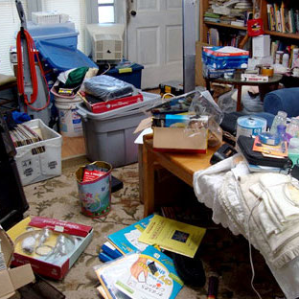

In [4]:
Image.open(r"C:\Users\shivang\Desktop\PROJECTS\Python-ML\CleanRoom Vs Dirty Room\input\images\train\messy\0.png")

In [5]:
for image in tqdm(os.listdir(train_messy)):
        path = os.path.join(train_messy, image)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(image_size,image_size)).flatten()
        np_img = np.asarray(img)
    
for image2 in tqdm(os.listdir(train_clean)):
        path = os.path.join(train_clean, image2)
        img2 = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img2 = cv2.resize(img2,(image_size,image_size)).flatten()
        np_img2 = np.asarray(img2)

100%|██████████| 96/96 [00:00<00:00, 388.06it/s]


Text(0.5, 1.0, 'Messy and Clean rooms in Grayscale')

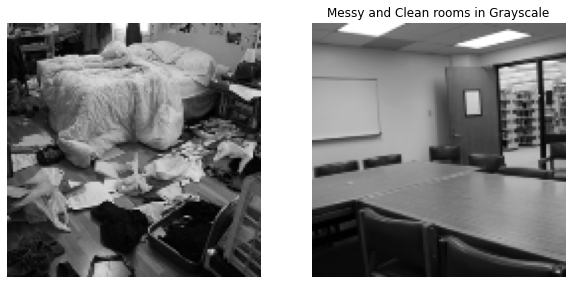

In [6]:
plt.figure(figsize=(10,9))
plt.subplot(1,2,1)
plt.imshow(np_img.reshape(image_size,image_size), cmap = "gray")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(np_img2.reshape(image_size,image_size),cmap = "gray")
plt.axis('off')
plt.title("Messy and Clean rooms in Grayscale")

In [7]:
def train_data():
    
    train_data_messy = []
    train_data_clean = []
    for image1 in tqdm(os.listdir(train_messy)):
        path = os.path.join(train_messy, image1)
        img1 = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img1 = cv2.resize(img1,(image_size,image_size))
        train_data_messy.append(img1)
    
    for image2 in tqdm(os.listdir(train_clean)):
        path = os.path.join(train_clean, image2)
        img2 = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img2 = cv2.resize(img2,(image_size,image_size))
        train_data_clean.append(img2)
    
    train_data = np.concatenate((np.asarray(train_data_messy), np.asarray(train_data_clean)),axis=0)
    return train_data
    
    

In [8]:
def test_data():
    test_data_messy = []
    test_data_clean = []
    for image1 in tqdm(os.listdir(test_messy)):
        path = os.path.join(test_messy, image1)
        img1 = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img1 = cv2.resize(img1,(image_size,image_size))
        test_data_messy.append(img1)
    
    for image2 in tqdm(os.listdir(test_clean)):
        path = os.path.join(test_clean, image2)
        img2 = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img2 = cv2.resize(img2,(image_size,image_size))
        test_data_clean.append(img2)
    
    test_data = np.concatenate((np.asarray(test_data_messy), np.asarray(test_data_clean)),axis=0)
    return test_data

In [9]:
train_data = train_data()
test_data = test_data()

100%|██████████| 10/10 [00:00<00:00, 345.78it/s]


In [10]:
train_data

array([[[203, 202, 196, ...,   1,   0,   0],
        [203, 202, 204, ...,   0,   0,   0],
        [213, 215, 219, ...,   0,   1,   0],
        ...,
        [134, 138, 139, ..., 124, 109, 118],
        [135, 122, 127, ..., 111, 112, 111],
        [140, 159, 157, ..., 118, 106,  46]],

       [[174, 173, 177, ...,  74,  59, 107],
        [174, 170, 169, ...,  75,  79, 107],
        [173, 170, 168, ...,  69,  73,  87],
        ...,
        [237, 229, 217, ...,  79,  82,  80],
        [215, 195, 200, ...,  75,  79,  73],
        [185, 198, 193, ...,  77,  73,  75]],

       [[244, 244, 245, ..., 244, 244, 245],
        [181, 180, 180, ..., 224, 221, 215],
        [ 28,  29,  27, ..., 205, 207, 206],
        ...,
        [226, 227, 226, ..., 227, 227, 227],
        [246, 246, 246, ..., 246, 246, 246],
        [253, 253, 253, ..., 253, 253, 253]],

       ...,

       [[171, 173, 173, ..., 131, 149, 154],
        [172, 173, 173, ..., 126, 157, 151],
        [173, 174, 175, ...,  52,  53,  67

In [11]:
x_data = np.concatenate((train_data,test_data),axis=0)
x_data = (x_data -  np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [12]:
z1 = np.zeros(96)
o1 = np.ones(96)
Y_train = np.concatenate((o1,z1),axis=0)
z = np.zeros(10)
o = np.ones(10)
Y_test = np.concatenate((o,z),axis=0)


In [13]:
y_data = np.concatenate((Y_train,Y_test),axis=0).reshape(x_data.shape[0],1)

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size = 0.15, random_state=0)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

In [15]:
number_of_train ,number_of_test 

(180, 32)

In [16]:
x_train = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])
x_test =  x_test.reshape(number_of_test,x_test.shape[1]*x_test.shape[2])
y_train = y_train.reshape(number_of_train,)
y_test = y_test.reshape(number_of_test,)

In [17]:
from sklearn.linear_model import LogisticRegression


In [18]:
model = LogisticRegression(max_iter = 1000)


In [19]:
x_train.shape , y_train.shape, x_test.shape, y_test.shape

((180, 16384), (180,), (32, 16384), (32,))

In [20]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
model.score(x_test,y_test)

0.75

In [22]:
ans = model.predict(x_test[:10])

In [23]:
ans = list(map(lambda x: "Messy" if x else "Clean",ans))

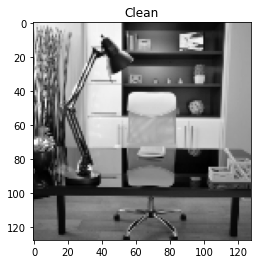

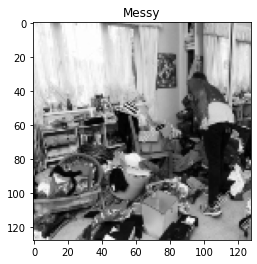

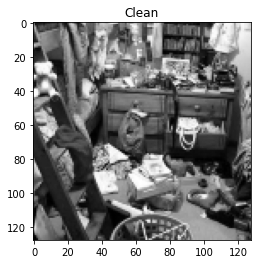

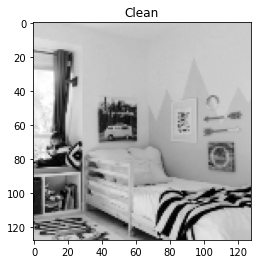

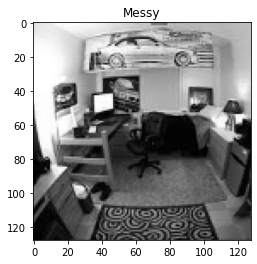

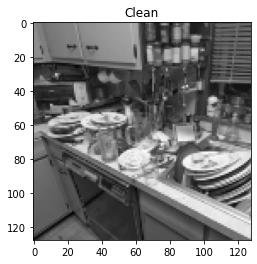

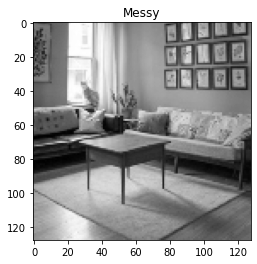

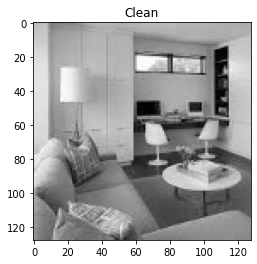

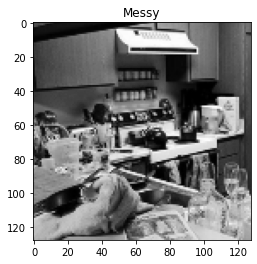

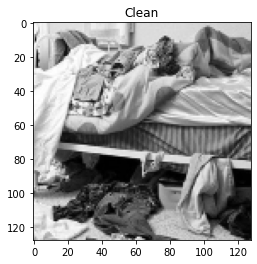

In [25]:
for i in range(len(ans)):
    plt.imshow(x_test[i].reshape(128,128),cmap='gray')
    plt.title(ans[i])
    plt.show()